# Q6

In [29]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [30]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  
  #######################
  #    your code here   #
  #######################

  h, w = img.shape
  fh = filter_size
  half_fh = fh // 2
  half_fw = fh // 2

  #make padding for image
  image = np.pad(img, ((half_fh , half_fh), (half_fw , half_fw)), mode='reflect')
  
  return image

In [31]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  #######################
  fh = filter_size

  # create a filter that is 1 / filter size * filter size
  filter = np.ones((fh, fh)) / (fh * fh)
  # then convolve the filter with the image
  result = convolve2d(image, filter, mode='valid')

  return result

In [32]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  #######################
  #    your code here   #
  #######################
  
  h, w = img.shape
    
  for i in range(h):
      for j in range(w):
          # hold the part i wanna apply meadian on
          hold = image[i : i + filter_size, j : j + filter_size].flatten()
          median = np.median(hold)
          result[i, j] = median
  return result

In [33]:

def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    #######################
    for i in range(filter_size):
        for j in range(filter_size):
            kernel[i, j] = (1 / (2 * np.pi * std**2)) * np.exp(-(i**2 + j**2) / (2 * std**2))
    kernel /= np.sum(kernel)
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

In [34]:
# Do not change this cell
image = cv2.imread('taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

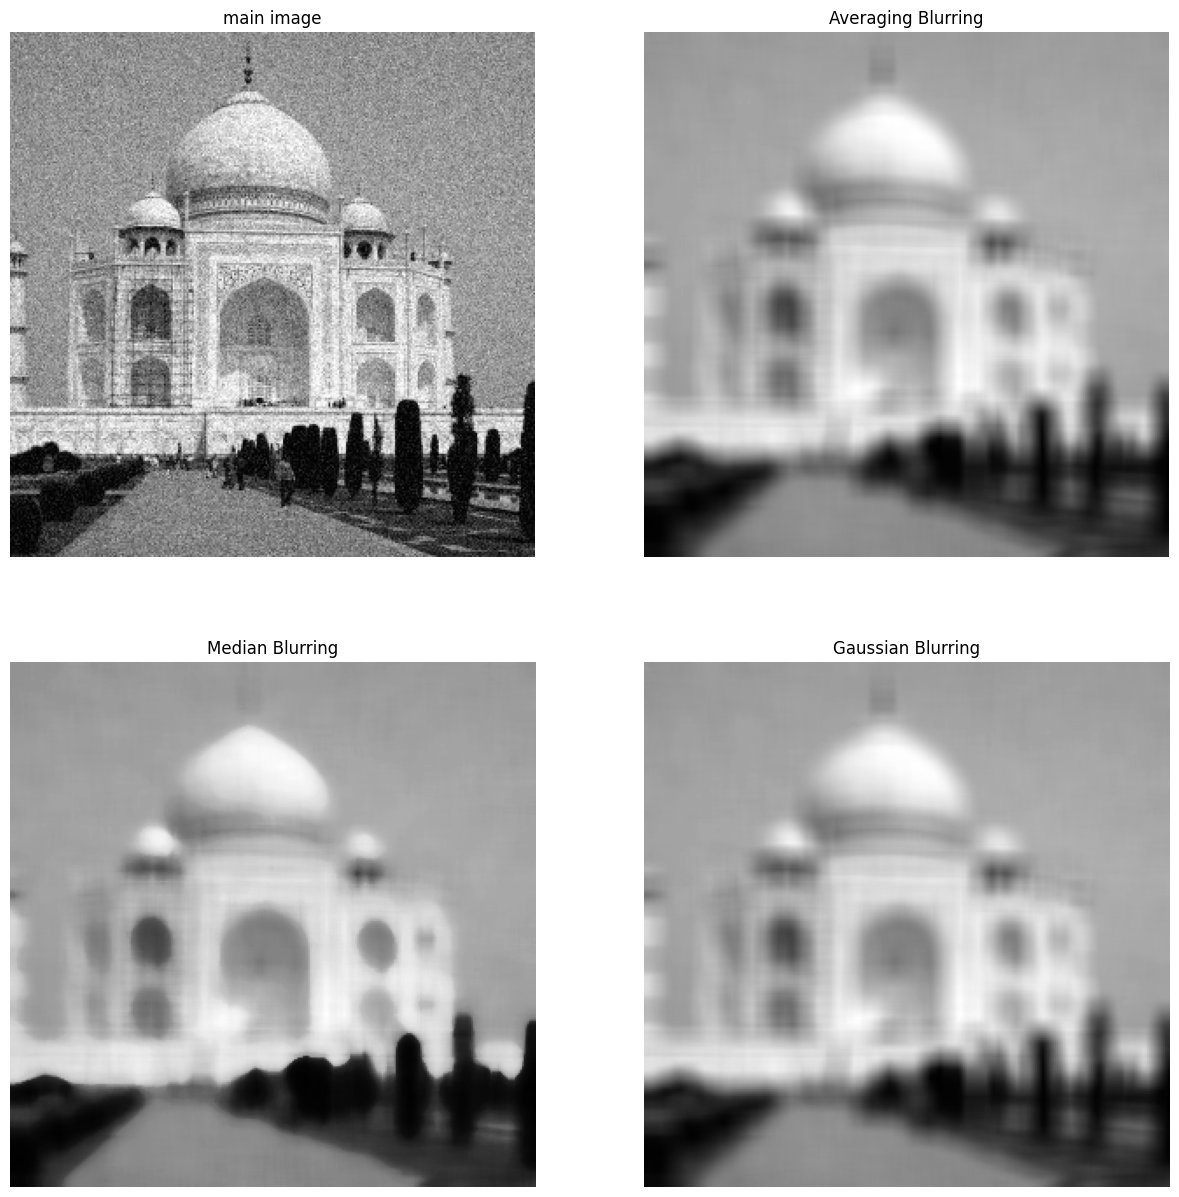

In [35]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [50]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    result = img.copy()
    #######################
    #    your code here   #
    #######################
    h , ww = img.shape
    w = np.zeros((filter_size , filter_size))  
    #give padding on the image
    img = Reflect101(img , filter_size)
    img = img.astype(np.float64)

    for i in range(h):
      for j in range(ww):
        kernel = np.zeros((filter_size , filter_size))  
        for k in range(filter_size):
          for l in range(filter_size):
            # kernel[k][l] = np.exp((-1 * ((i - k) ** 2 + (j - l) ** 2) / 2 * std ** 2) - ((img[i][j] - img[k + i][j + l]) ** 2) / (2 * rstd ** 2))
            kernel[k][l] = np.exp(-1*(((filter_size / 2-k)**2+(filter_size-l)**2)/(2*std**2))+(-1*((img[i][j]-img[k+i][l+j])**2)/(2*rstd**2)))
        kernel = kernel /np.sum(kernel)
        result[i][j] = np.sum(kernel * img[i : i + filter_size , j : j + filter_size])
    return result

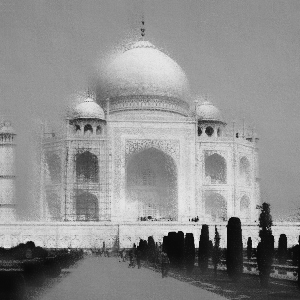

In [51]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
cv2_imshow(bilateral)

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [12]:
AveragingBlurring = cv2.blur(image , (15,15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image , (15,15) , 40)
Bilateral = cv2.bilateralFilter(image , 15 ,40 ,40)

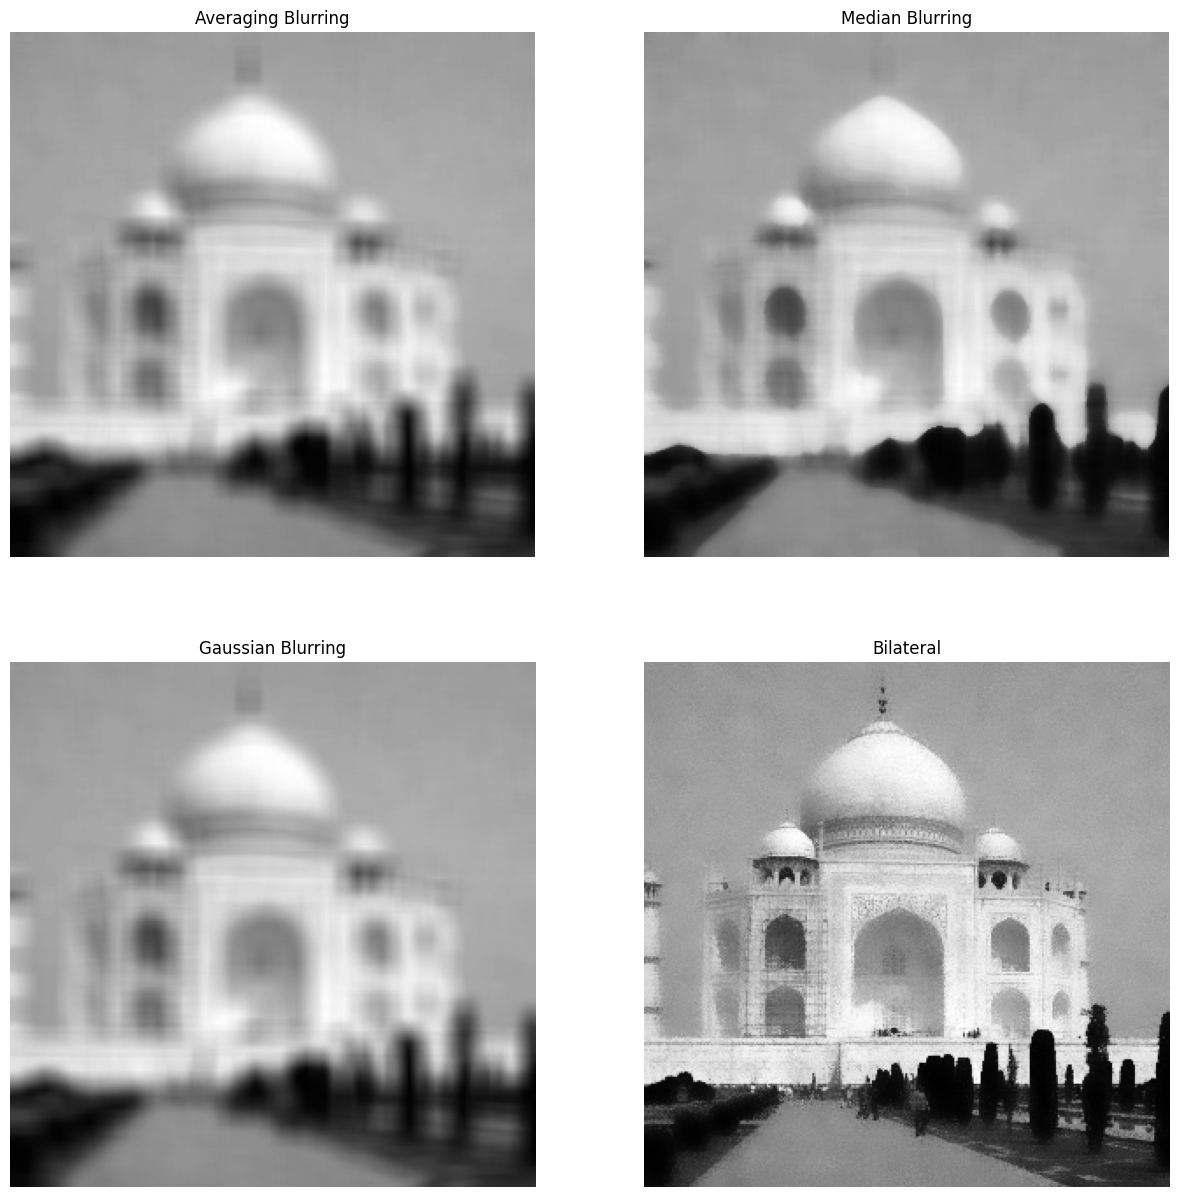

In [13]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")